In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

data=pd.read_csv('train_data.csv')
data.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558,41-50


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available Extra Rooms in Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

In [3]:
data.columns

Index(['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
       'patientid', 'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Visitors with Patient', 'Age',
       'Admission_Deposit', 'Stay'],
      dtype='object')

In [4]:
print (data.isnull().sum())

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                             113
patientid                               0
City_Code_Patient                    4532
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64


# Data Cleansing

In [5]:
data["Age"].unique()

array(['51-60', '71-80', '31-40', '41-50', '81-90', '61-70', '21-30',
       '20-Nov', '0-10', '91-100'], dtype=object)

In [6]:
data['Available Extra Rooms in Hospital'].unique()

array([ 3,  2,  1,  4,  6,  5,  7,  8,  9, 10, 12,  0, 11, 20, 14, 21, 13,
       24])

In [7]:
data["Hospital_region_code"].unique()

array(['Z', 'X', 'Y'], dtype=object)

In [8]:
data["Bed Grade"].unique()

array([ 2.,  3.,  4.,  1., nan])

In [9]:
data["Type of Admission"].unique()

array(['Emergency', 'Trauma', 'Urgent'], dtype=object)

In [10]:
data["Severity of Illness"].unique()

array(['Extreme', 'Moderate', 'Minor'], dtype=object)

In [11]:
data["Department"].unique()

array(['radiotherapy', 'anesthesia', 'gynecology', 'TB & Chest disease',
       'surgery'], dtype=object)

In [12]:
data["Stay"].unique()

array(['0-10', '41-50', '31-40', '20-Nov', '51-60', '21-30', '71-80',
       'More than 100 Days', '81-90', '61-70', '91-100'], dtype=object)

In [13]:
df = pd.DataFrame(data)
x = df["Bed Grade"].mean()

df["Bed Grade"].fillna(x, inplace = True)
print (df.isnull().sum())

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                               0
patientid                               0
City_Code_Patient                    4532
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64


In [14]:
display(df)

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558,41-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,318434,6,a,6,X,3,radiotherapy,Q,F,4.0,86499,23.0,Emergency,Moderate,3,41-50,4144,20-Nov
318434,318435,24,a,1,X,2,anesthesia,Q,E,4.0,325,8.0,Urgent,Moderate,4,81-90,6699,31-40
318435,318436,7,a,4,X,3,gynecology,R,F,4.0,125235,10.0,Emergency,Minor,3,71-80,4235,20-Nov
318436,318437,11,b,2,Y,3,anesthesia,Q,D,3.0,91081,8.0,Trauma,Minor,5,20-Nov,3761,20-Nov


In [15]:
stay_bins = {'21-30': 'Long',
 '20-Nov': 'Short',
 '31-40': 'Long',
 '51-60': 'Long',
 '0-10': 'Short',
 '41-50': 'Long',
 '71-80': 'Long',
 'More than 100 Days': 'Long',
 '81-90': 'Long',
 '91-100': 'Long',
 '61-70': 'Long'}

df['Stay Bins'] = df['Stay'].map(stay_bins)

In [16]:
stay_nums = {'21-30': 2,
 '20-Nov': 1,
 '31-40': 3,
 '51-60': 5,
 '0-10': 0,
 '41-50': 4,
 '71-80': 7,
 'More than 100 Days': 10,
 '81-90': 8,
 '91-100': 9,
 '61-70': 6}

df['Stay Nums'] = df['Stay'].map(stay_nums)

In [17]:
df['Stay Bins'].unique()

array(['Short', 'Long'], dtype=object)

In [18]:
y = pd.get_dummies(df.Hospital_region_code, prefix='Region')
print(y.head())

   Region_X  Region_Y  Region_Z
0         0         0         1
1         0         0         1
2         1         0         0
3         0         1         0
4         0         1         0


In [19]:
onehot_df1 = pd.get_dummies(df,columns=['Department'])
onehot_df2 = pd.get_dummies(df,columns=['Stay Bins'])
onehot_df3 = pd.get_dummies(df,columns=['Hospital_region_code'])

df = df.merge(onehot_df1, on=['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
       'patientid', 'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Visitors with Patient', 'Age',
       'Admission_Deposit', 'Stay','Stay Bins','Stay Nums'])\
.merge(onehot_df2,on=['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
       'patientid', 'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Visitors with Patient', 'Age',
       'Admission_Deposit', 'Stay','Stay Nums'])\
.merge(onehot_df3,on=['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
       'patientid', 'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Visitors with Patient', 'Age',
       'Admission_Deposit', 'Stay','Stay Bins','Stay Nums'])
              
display(df)

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,...,Department_TB & Chest disease,Department_anesthesia,Department_gynecology,Department_radiotherapy,Department_surgery,Stay Bins_Long,Stay Bins_Short,Hospital_region_code_X,Hospital_region_code_Y,Hospital_region_code_Z
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,...,0,0,0,1,0,0,1,0,0,1
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,...,0,0,0,1,0,1,0,0,0,1
2,3,10,e,1,X,2,anesthesia,S,E,2.0,...,0,1,0,0,0,1,0,1,0,0
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,...,0,0,0,1,0,1,0,0,1,0
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,...,0,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,318434,6,a,6,X,3,radiotherapy,Q,F,4.0,...,0,0,0,1,0,0,1,1,0,0
318434,318435,24,a,1,X,2,anesthesia,Q,E,4.0,...,0,1,0,0,0,1,0,1,0,0
318435,318436,7,a,4,X,3,gynecology,R,F,4.0,...,0,0,1,0,0,0,1,1,0,0
318436,318437,11,b,2,Y,3,anesthesia,Q,D,3.0,...,0,1,0,0,0,0,1,0,1,0


In [20]:
df.columns

Index(['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
       'patientid', 'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Visitors with Patient', 'Age',
       'Admission_Deposit', 'Stay', 'Stay Bins', 'Stay Nums',
       'Department_TB & Chest disease', 'Department_anesthesia',
       'Department_gynecology', 'Department_radiotherapy',
       'Department_surgery', 'Stay Bins_Long', 'Stay Bins_Short',
       'Hospital_region_code_X', 'Hospital_region_code_Y',
       'Hospital_region_code_Z'],
      dtype='object')

In [21]:
illness_severity_bins = {'Extreme' : 3,
                         'Moderate' : 2,
                         'Minor' : 1}

df['Illness Severity Bins'] = df['Severity of Illness'].map(illness_severity_bins)

In [22]:
admission_bins = {'Urgent': 1,
                 'Emergency': 2,
                 'Trauma': 3}


df['Admission Bins'] = df['Type of Admission'].map(admission_bins)

In [23]:
age_bins = {'21-30': 2,
 '20-Nov': 1,
 '31-40': 3,
 '51-60': 5,
 '0-10': 0,
 '41-50': 4,
 '71-80': 7,
 '81-90': 8,
 '91-100': 9,
 '61-70': 6}

df['Age Bins'] = df['Age'].map(age_bins)
display(df)

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,...,Department_radiotherapy,Department_surgery,Stay Bins_Long,Stay Bins_Short,Hospital_region_code_X,Hospital_region_code_Y,Hospital_region_code_Z,Illness Severity Bins,Admission Bins,Age Bins
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,...,1,0,0,1,0,0,1,3,2,5
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,...,1,0,1,0,0,0,1,3,3,5
2,3,10,e,1,X,2,anesthesia,S,E,2.0,...,0,0,1,0,1,0,0,3,3,5
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,...,1,0,1,0,0,1,0,3,3,5
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,...,1,0,1,0,0,1,0,3,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,318434,6,a,6,X,3,radiotherapy,Q,F,4.0,...,1,0,0,1,1,0,0,2,2,4
318434,318435,24,a,1,X,2,anesthesia,Q,E,4.0,...,0,0,1,0,1,0,0,2,1,8
318435,318436,7,a,4,X,3,gynecology,R,F,4.0,...,0,0,0,1,1,0,0,1,2,7
318436,318437,11,b,2,Y,3,anesthesia,Q,D,3.0,...,0,0,0,1,0,1,0,1,3,1


In [24]:
df['Age Bins'].unique()

array([5, 7, 3, 4, 8, 6, 2, 1, 0, 9])

In [25]:
df_age = df['Age Bins']
display(df_age)

0         5
1         5
2         5
3         5
4         5
         ..
318433    4
318434    8
318435    7
318436    1
318437    1
Name: Age Bins, Length: 318438, dtype: int64

In [26]:
df_stay = df['Stay Bins']
display(df_stay)

0         Short
1          Long
2          Long
3          Long
4          Long
          ...  
318433    Short
318434     Long
318435    Short
318436    Short
318437    Short
Name: Stay Bins, Length: 318438, dtype: object

In [27]:
df.columns

Index(['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
       'patientid', 'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Visitors with Patient', 'Age',
       'Admission_Deposit', 'Stay', 'Stay Bins', 'Stay Nums',
       'Department_TB & Chest disease', 'Department_anesthesia',
       'Department_gynecology', 'Department_radiotherapy',
       'Department_surgery', 'Stay Bins_Long', 'Stay Bins_Short',
       'Hospital_region_code_X', 'Hospital_region_code_Y',
       'Hospital_region_code_Z', 'Illness Severity Bins', 'Admission Bins',
       'Age Bins'],
      dtype='object')

In [28]:
df['Available Extra Rooms in Hospital'].shape

(318438,)

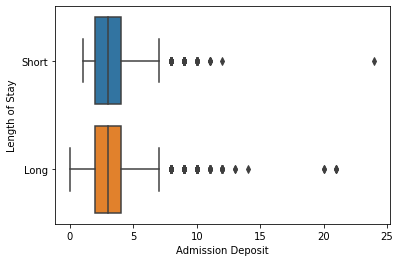

In [29]:
_ = sns.boxplot(x='Available Extra Rooms in Hospital',y='Stay Bins',data=df)
_ = plt.xlabel('Admission Deposit')
_ = plt.ylabel('Length of Stay')
plt.show()

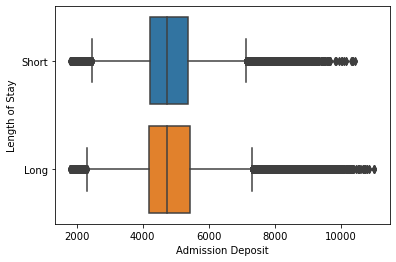

In [30]:
_ = sns.boxplot(x='Admission_Deposit',y='Stay Bins',data=df)
_ = plt.xlabel('Admission Deposit')
_ = plt.ylabel('Length of Stay')
plt.show()

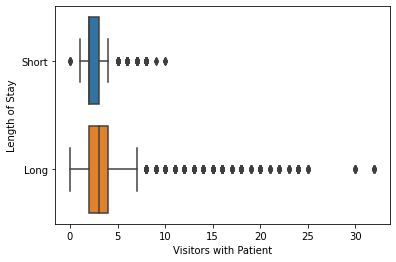

In [31]:
_ = sns.boxplot(x='Visitors with Patient',y='Stay Bins',data=df)
_ = plt.xlabel('Visitors with Patient')
_ = plt.ylabel('Length of Stay')
plt.show()

In [32]:
def outliers(df):
    Q1= df['Available Extra Rooms in Hospital'].quantile(0.25)
    Q3 = df['Available Extra Rooms in Hospital'].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit

upper, lower = outliers(df)
print("Upper whisker: ", upper)
print("Lower Whisker: ", lower)

Upper whisker:  7.0
Lower Whisker:  -1.0


In [33]:
df_avail_clean = df[(df['Available Extra Rooms in Hospital'] > lower) & (df['Available Extra Rooms in Hospital'] < upper)]
df_avail_clean

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,...,Department_radiotherapy,Department_surgery,Stay Bins_Long,Stay Bins_Short,Hospital_region_code_X,Hospital_region_code_Y,Hospital_region_code_Z,Illness Severity Bins,Admission Bins,Age Bins
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,...,1,0,0,1,0,0,1,3,2,5
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,...,1,0,1,0,0,0,1,3,3,5
2,3,10,e,1,X,2,anesthesia,S,E,2.0,...,0,0,1,0,1,0,0,3,3,5
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,...,1,0,1,0,0,1,0,3,3,5
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,...,1,0,1,0,0,1,0,3,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,318434,6,a,6,X,3,radiotherapy,Q,F,4.0,...,1,0,0,1,1,0,0,2,2,4
318434,318435,24,a,1,X,2,anesthesia,Q,E,4.0,...,0,0,1,0,1,0,0,2,1,8
318435,318436,7,a,4,X,3,gynecology,R,F,4.0,...,0,0,0,1,1,0,0,1,2,7
318436,318437,11,b,2,Y,3,anesthesia,Q,D,3.0,...,0,0,0,1,0,1,0,1,3,1


In [34]:
def outliers(df_avail_clean):
    Q1= df_avail_clean['Admission_Deposit'].quantile(0.25)
    Q3 = df_avail_clean['Admission_Deposit'].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit

upper, lower = outliers(df_avail_clean)
print("Upper whisker: ", upper)
print("Lower Whisker: ", lower)

Upper whisker:  7243.0
Lower Whisker:  2363.0


In [35]:
df_admission_clean = df_avail_clean[(df_avail_clean['Admission_Deposit'] > lower) & (df_avail_clean['Admission_Deposit'] < upper)]
df_admission_clean

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,...,Department_radiotherapy,Department_surgery,Stay Bins_Long,Stay Bins_Short,Hospital_region_code_X,Hospital_region_code_Y,Hospital_region_code_Z,Illness Severity Bins,Admission Bins,Age Bins
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,...,1,0,0,1,0,0,1,3,2,5
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,...,1,0,1,0,0,0,1,3,3,5
2,3,10,e,1,X,2,anesthesia,S,E,2.0,...,0,0,1,0,1,0,0,3,3,5
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,...,1,0,1,0,0,1,0,3,3,5
5,6,23,a,6,X,2,anesthesia,S,F,2.0,...,0,0,0,1,1,0,0,3,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,318434,6,a,6,X,3,radiotherapy,Q,F,4.0,...,1,0,0,1,1,0,0,2,2,4
318434,318435,24,a,1,X,2,anesthesia,Q,E,4.0,...,0,0,1,0,1,0,0,2,1,8
318435,318436,7,a,4,X,3,gynecology,R,F,4.0,...,0,0,0,1,1,0,0,1,2,7
318436,318437,11,b,2,Y,3,anesthesia,Q,D,3.0,...,0,0,0,1,0,1,0,1,3,1


In [36]:
def outliers(df_admission_clean):
    Q1= df_admission_clean['Visitors with Patient'].quantile(0.25)
    Q3 = df_admission_clean['Visitors with Patient'].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit

upper, lower = outliers(df_admission_clean)
print("Upper whisker: ", upper)
print("Lower Whisker: ", lower)

Upper whisker:  7.0
Lower Whisker:  -1.0


In [37]:
df = df_admission_clean[(df_admission_clean['Visitors with Patient'] > lower) & (df_admission_clean['Visitors with Patient'] < upper)]
df

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,...,Department_radiotherapy,Department_surgery,Stay Bins_Long,Stay Bins_Short,Hospital_region_code_X,Hospital_region_code_Y,Hospital_region_code_Z,Illness Severity Bins,Admission Bins,Age Bins
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,...,1,0,0,1,0,0,1,3,2,5
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,...,1,0,1,0,0,0,1,3,3,5
2,3,10,e,1,X,2,anesthesia,S,E,2.0,...,0,0,1,0,1,0,0,3,3,5
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,...,1,0,1,0,0,1,0,3,3,5
5,6,23,a,6,X,2,anesthesia,S,F,2.0,...,0,0,0,1,1,0,0,3,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,318434,6,a,6,X,3,radiotherapy,Q,F,4.0,...,1,0,0,1,1,0,0,2,2,4
318434,318435,24,a,1,X,2,anesthesia,Q,E,4.0,...,0,0,1,0,1,0,0,2,1,8
318435,318436,7,a,4,X,3,gynecology,R,F,4.0,...,0,0,0,1,1,0,0,1,2,7
318436,318437,11,b,2,Y,3,anesthesia,Q,D,3.0,...,0,0,0,1,0,1,0,1,3,1


# Insights

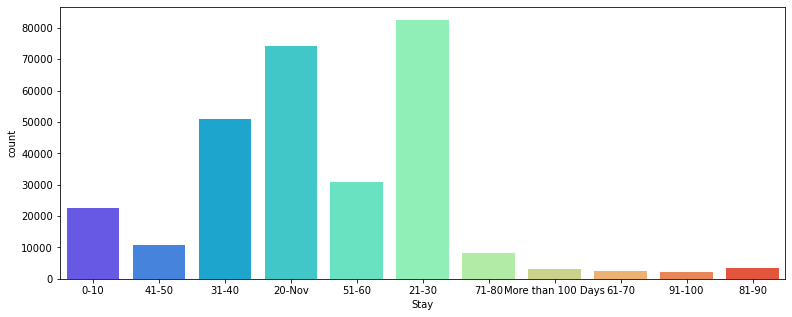

In [38]:
plt.figure(figsize = (13,5))
sns.countplot(x = 'Stay', data = df, palette = 'rainbow')
plt.show()

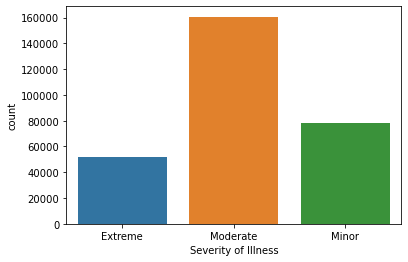

In [39]:
sns.countplot(x="Severity of Illness",data=df)
plt.show() 
# Moderate illness is the most common, followed by minor and extreme illnesses.

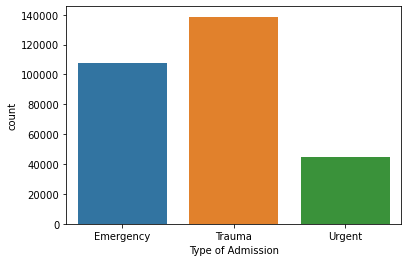

In [40]:
sns.countplot(x="Type of Admission",data=df)
plt.show() 
# Illness categorized as "Trauma" is the most common type of admission, followed closely by emergency.


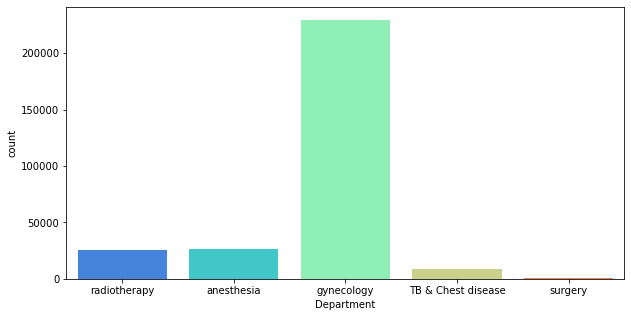

In [41]:
plt.figure(figsize = (10,5))
sns.countplot(x="Department",data=df,palette = 'rainbow')
plt.show()
#Seems like Department may not have a significant effect on LOS.
#The gynecology department receives by far the highest number of hospital cases, nearly 7 times the next highest department, radiotherapy and anesthesia.

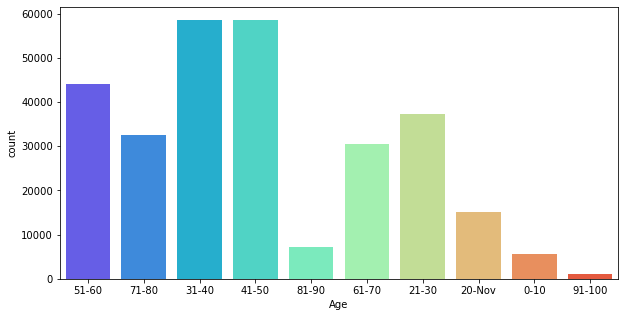

In [42]:
plt.figure(figsize = (10,5))
sns.countplot(x= 'Age', data = df, palette = 'rainbow')
plt.show()
#Patients aged 31 to 40 and 41 to 50 have the highest number of admittances, followed by 51-60, exemplifying that the middle-aged patients require the most hospital visits.
#Meanwhile patients aged 81-90 and 91-100 have the lowest number of admittances.

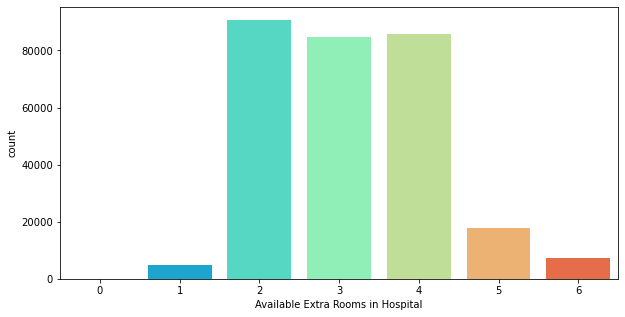

In [43]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'Available Extra Rooms in Hospital', data = df, palette = 'rainbow')
plt.show()
# 2-4 extra rooms are the most common amount of available extra rooms in a hospital on a typical day.
## Maybe try a pie chart instead?

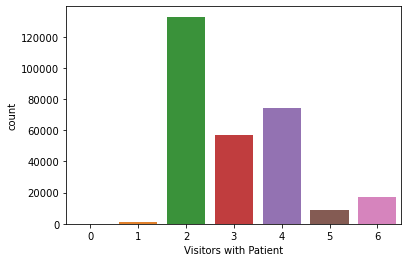

In [44]:
sns.countplot(x="Visitors with Patient",data=df)
plt.show() 

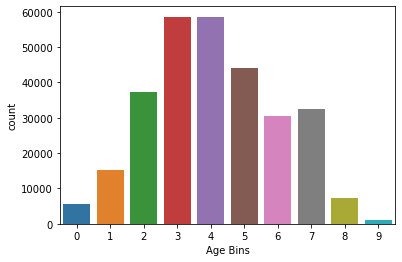

In [45]:
sns.countplot(x="Age Bins",data=df)
plt.show() 

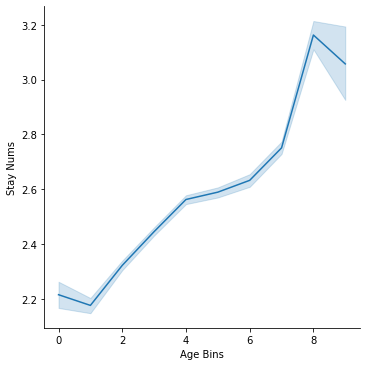

In [46]:
sns.relplot(x="Age Bins",
                y="Stay Nums",
                data=df,
                kind="line")
plt.show()

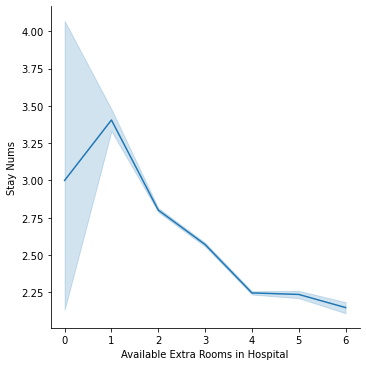

In [47]:
sns.relplot(x="Available Extra Rooms in Hospital",
                y="Stay Nums",
                data=df,
                kind="line")
plt.show()

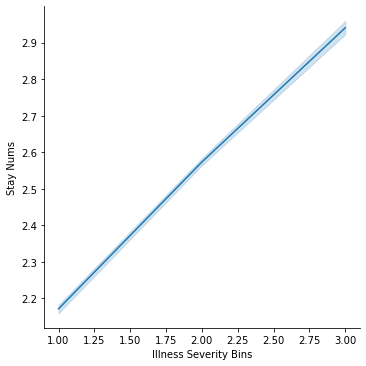

In [48]:
sns.relplot(x="Illness Severity Bins",
                y="Stay Nums",
                data=df,
                kind="line")
plt.show()

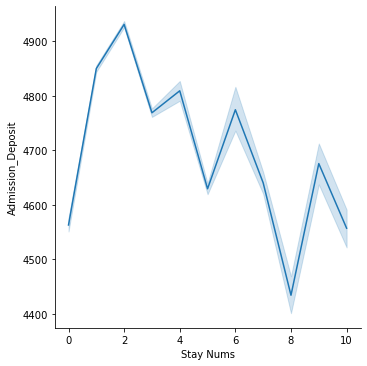

In [49]:
sns.relplot(y="Admission_Deposit",
                x="Stay Nums",
                data=df,
                kind="line")
plt.show()

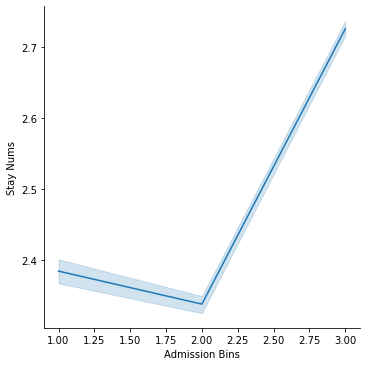

In [50]:
sns.relplot(x="Admission Bins",
                y="Stay Nums",
                data=df,
                kind="line")
plt.show()

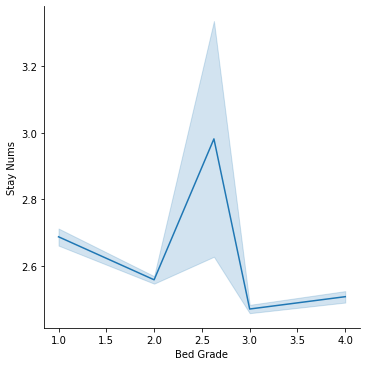

In [51]:
sns.relplot(x="Bed Grade",
                y="Stay Nums",
                data=df,
                kind="line")
plt.show()
#Does not indicate Bed Grade would have a significant effect on LOS

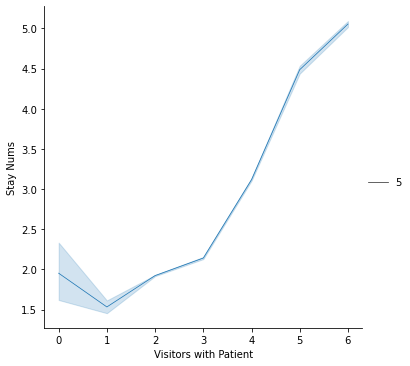

In [52]:
sns.relplot(x="Visitors with Patient",
                y="Stay Nums",
                data=df,
                kind="line",
           size=5)
plt.show()

<AxesSubplot:>

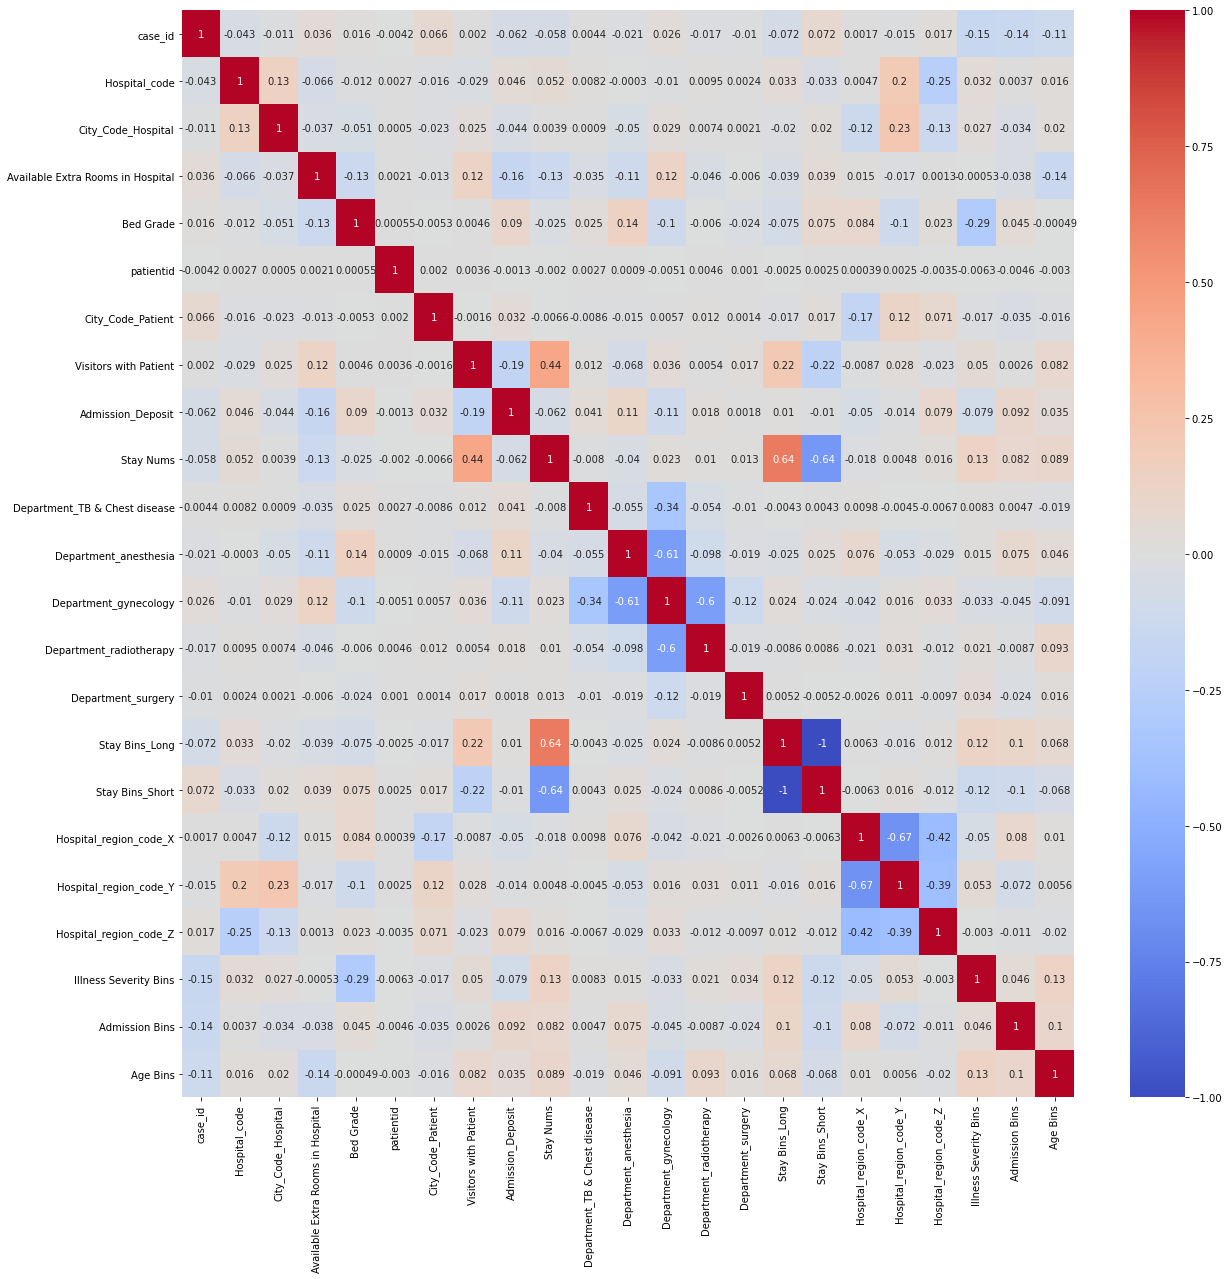

In [53]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

# Logistic Regression and Analysis

In [54]:
df_staylong = df['Stay Bins_Long']
feature_cols = ['Available Extra Rooms in Hospital','Visitors with Patient',
       'Admission_Deposit', 'Illness Severity Bins','Admission Bins',
       'Age Bins']
X = df[feature_cols]
y = df['Stay Bins_Long']

In [55]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [56]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 1787, 22260],
       [ 2068, 46606]])

Text(0.5, 257.44, 'Predicted label')

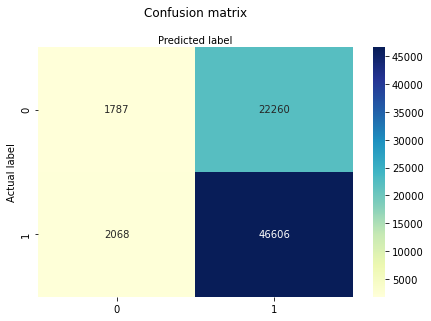

In [57]:
%matplotlib inline

class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [58]:
#F1 Score:
2 * (metrics.precision_score(y_test, y_pred) * metrics.recall_score(y_test, y_pred))/(metrics.precision_score(y_test, y_pred) + metrics.recall_score(y_test, y_pred))

0.7930236515228859

In [59]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.46      0.07      0.13     24047
           1       0.68      0.96      0.79     48674

    accuracy                           0.67     72721
   macro avg       0.57      0.52      0.46     72721
weighted avg       0.61      0.67      0.57     72721



In [60]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print('Intercept:', logreg.intercept_)

Accuracy: 0.6654611460238445
Precision: 0.6767635698312665
Recall: 0.957513251427867
Intercept: [-0.0335658]


In [61]:
#
log_odds = logreg.coef_[0]

pd.DataFrame(log_odds, 
             X.columns, 
             columns=['coef'])\
            .sort_values(by='coef', ascending=False)

,coef
Visitors with Patient,0.417722
Illness Severity Bins,0.175625
Admission Bins,0.152340
Age Bins,0.002887
Admission_Deposit,-0.000085
Available Extra Rooms in Hospital,-0.239693


In [62]:
log_odds

array([-2.39692936e-01,  4.17721970e-01, -8.46630666e-05,  1.75624915e-01,
        1.52339914e-01,  2.88652034e-03])

In [63]:
log_odds_df = pd.DataFrame(log_odds, 
             X.columns, 
             columns=['coef'])\
            .sort_values(by='coef', ascending=False)

log_odds_df

,coef
Visitors with Patient,0.417722
Illness Severity Bins,0.175625
Admission Bins,0.152340
Age Bins,0.002887
Admission_Deposit,-0.000085
Available Extra Rooms in Hospital,-0.239693


In [64]:
odds = np.exp(logreg.coef_[0])
pd.DataFrame(odds, 
             X.columns, 
             columns=['coef'])\
            .sort_values(by='coef', ascending=False)

,coef
Visitors with Patient,1.518498
Illness Severity Bins,1.191991
Admission Bins,1.164556
Age Bins,1.002891
Admission_Deposit,0.999915
Available Extra Rooms in Hospital,0.786869


# Logistic Regression Plots

In [65]:
log_odds_df['coef']

Visitors with Patient                0.417722
Illness Severity Bins                0.175625
Admission Bins                       0.152340
Age Bins                             0.002887
Admission_Deposit                   -0.000085
Available Extra Rooms in Hospital   -0.239693
Name: coef, dtype: float64

In [66]:
coef_array = log_odds_df['coef'].array
coef_array

<PandasArray>
[ 0.41772197025415236,  0.17562491527848373,   0.1523399139718679,
 0.002886520341911865, -8.4663066606234e-05, -0.23969293614183507]
Length: 6, dtype: float64

In [67]:
coef_array_subset = coef_array[1:6]
coef_array_subset

<PandasArray>
[ 0.17562491527848373,   0.1523399139718679, 0.002886520341911865,
 -8.4663066606234e-05, -0.23969293614183507]
Length: 5, dtype: float64

In [68]:
fixed_value_1 = 2
fixed_value_1
#Mode of Visitors with Patient

2

In [69]:
fixed_value_2 = df['Illness Severity Bins'].mean()
fixed_value_2

1.9083130214761364

In [70]:
fixed_value_3= df['Age Bins'].mean()
fixed_value_3

4.123473172878256

In [71]:
fixed_value_4=df['Admission Bins'].mean()
fixed_value_4

2.3234862366397255

In [72]:
fixed_value_5=df['Admission_Deposit'].mean()
fixed_value_5

4796.2285711339

In [73]:
fixed_value_6= 2
fixed_value_6
#Mode of Available Rooms in Hospital

2

In [74]:
fixed_value_array_subset = np.array([fixed_value_2,fixed_value_3,fixed_value_4,fixed_value_5,fixed_value_6])
fixed_value_array_subset

array([1.90831302e+00, 4.12347317e+00, 2.32348624e+00, 4.79622857e+03,
       2.00000000e+00])

In [75]:
coef_dot_product = np.dot(coef_array_subset,fixed_value_array_subset)
coef_dot_product

0.08457436016906328

In [76]:
y_int_plusdotproduct = -0.0335658 + coef_dot_product
y_int_plusdotproduct

0.05100856016906328

In [77]:
x = np.arange(0,10,2)
print(x.size)

5


In [78]:
y = coef_array[0] * x + y_int_plusdotproduct
print(y.size)
y

5


array([0.05100856, 0.8864525 , 1.72189644, 2.55734038, 3.39278432])

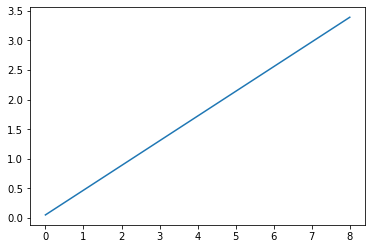

In [79]:
plt.plot(x,y)

plt.show()

In [80]:
y_odds = np.exp(y)
y_odds

array([ 1.0523319 ,  2.42650634,  5.59512924, 12.90145869, 29.74866694])

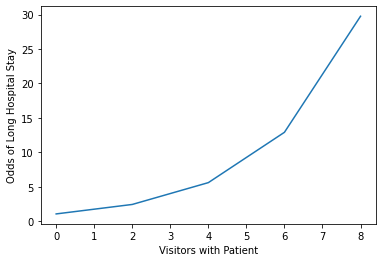

In [81]:
plt.plot(x,y_odds)
plt.xlabel("Visitors with Patient")
plt.ylabel("Odds of Long Hospital Stay")
plt.show()
#as the number of visitors increases here, this graph is showing the odds of success
#at 25, there's a 20,000:1 odds that there's a success

In [82]:
coef_array_avail = coef_array[0:5]

fixed_value_available_rooms = np.array([fixed_value_1,fixed_value_2,fixed_value_3,fixed_value_4,fixed_value_5])
coef_array_avail

<PandasArray>
[ 0.41772197025415236,  0.17562491527848373,   0.1523399139718679,
 0.002886520341911865, -8.4663066606234e-05]
Length: 5, dtype: float64

In [83]:
coef_dot_product_avail = np.dot(coef_array_avail[0:5],fixed_value_available_rooms)

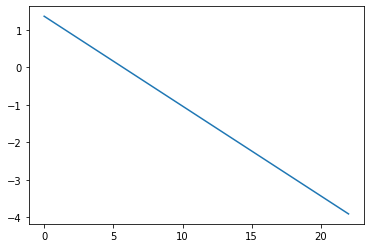

In [84]:
y_int_plusdotproduct_avail = -0.03710446 + coef_dot_product_avail

x = np.arange(0,24,2)

y = coef_array[5] * x + y_int_plusdotproduct_avail

plt.plot(x,y)

plt.show()

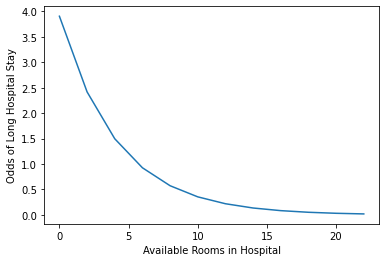

In [85]:
y_odds_avail = np.exp(y)
y_odds_avail

plt.plot(x,y_odds_avail)
plt.xlabel("Available Rooms in Hospital")
plt.ylabel("Odds of Long Hospital Stay")
plt.show()
#Available Rooms

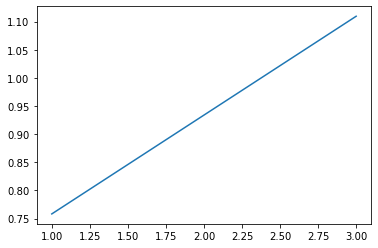

In [86]:
coef_array_avail = np.array([    0.4315035915415376,     0.1108758179248843,
   0.003280307283416706, -4.825012165862495e-05,   -0.24014379036127687])

fixed_value_available_rooms = np.array([fixed_value_1,fixed_value_3,fixed_value_4,fixed_value_5,fixed_value_6])
coef_dot_product_avail = np.dot(coef_array_avail,fixed_value_available_rooms)
y_int_plusdotproduct_avail = -0.0335658 + coef_dot_product_avail

x = np.array([1,2,3])

y = coef_array[1] * x + y_int_plusdotproduct_avail

plt.plot(x,y)

plt.show()

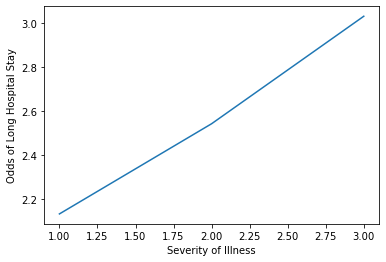

In [87]:
y_odds_ill = np.exp(y)

plt.plot(x,y_odds_ill)
plt.xlabel("Severity of Illness")
plt.ylabel("Odds of Long Hospital Stay")
plt.show()
#Illness Severity

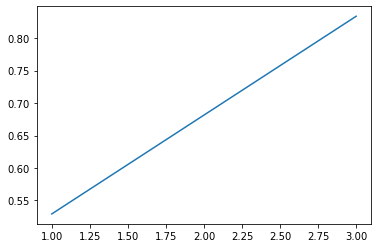

In [88]:
coef_array_avail = np.array([    0.4315035915415376,     0.1317624328614807,
   0.003280307283416706, -4.825012165862495e-05,   -0.24014379036127687])

fixed_value_available_rooms = np.array([fixed_value_1,fixed_value_2,fixed_value_4,fixed_value_5,fixed_value_6])

coef_dot_product_avail = np.dot(coef_array_avail,fixed_value_available_rooms)

y_int_plusdotproduct_avail = -0.0335658 + coef_dot_product_avail

x = np.array([1,2,3])

y = coef_array[2] * x + y_int_plusdotproduct_avail

plt.plot(x,y)

plt.show()

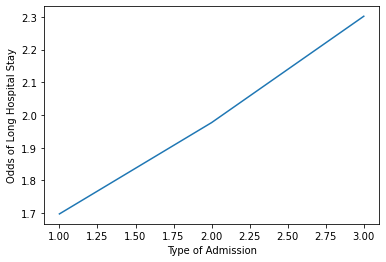

In [89]:
y_odds_ad_bins = np.exp(y)

plt.plot(x,y_odds_ad_bins)
plt.xlabel("Type of Admission")
plt.ylabel("Odds of Long Hospital Stay")
plt.show()
#Admission Bins

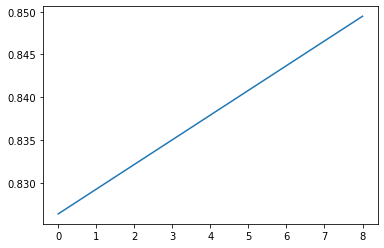

In [90]:
coef_array_avail = np.array([    0.4315035915415376,     0.1317624328614807,0.1108758179248843, -4.825012165862495e-05,   -0.24014379036127687])

fixed_value_available_rooms = np.array([fixed_value_1,fixed_value_2,fixed_value_3,fixed_value_5,fixed_value_6])

coef_dot_product_avail = np.dot(coef_array_avail,fixed_value_available_rooms)

y_int_plusdotproduct_avail = -0.0335658 + coef_dot_product_avail

x = np.arange(0,9,1)

y = coef_array[3] * x + y_int_plusdotproduct_avail

plt.plot(x,y)
plt.show()

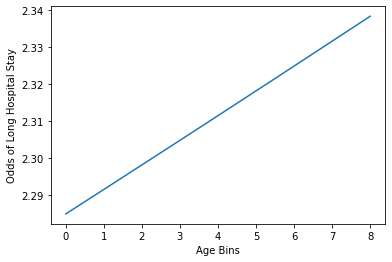

In [91]:
y_odds_age_bins = np.exp(y)

plt.plot(x,y_odds_age_bins)
plt.xlabel("Age Bins")
plt.ylabel("Odds of Long Hospital Stay")
plt.show()
#Age Bins

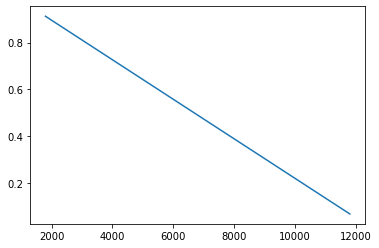

In [92]:
coef_array_avail = np.array([    0.4315035915415376,     0.1317624328614807,     0.1108758179248843,
   0.003280307283416706,   -0.24014379036127687])
fixed_value_available_rooms = np.array([fixed_value_1,fixed_value_2,fixed_value_3,fixed_value_4,fixed_value_6])

coef_dot_product_avail = np.dot(coef_array_avail,fixed_value_available_rooms)

y_int_plusdotproduct_avail = -0.0335658 + coef_dot_product_avail

x = np.arange(1800,12000,200)

y = coef_array[4] * x + y_int_plusdotproduct_avail

plt.plot(x,y)
plt.show()

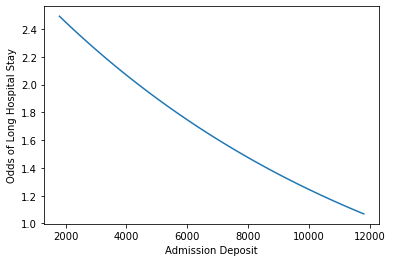

In [93]:
y_odds_deposit = np.exp(y)

plt.plot(x,y_odds_deposit)
plt.xlabel("Admission Deposit")
plt.ylabel("Odds of Long Hospital Stay")
plt.show()
#Admission Deposit